# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

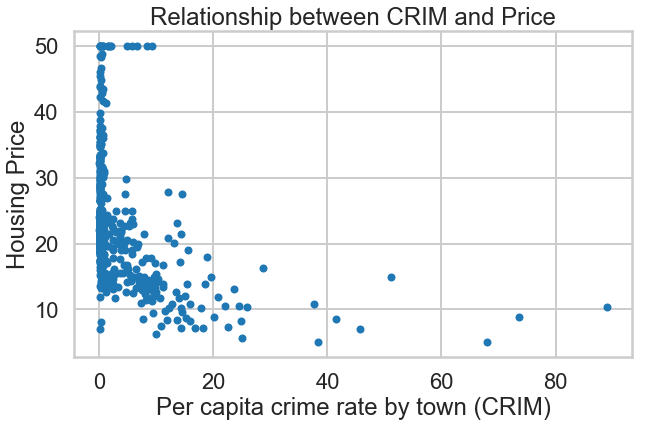

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(bos.CRIM, bos.PRICE, marker='.')
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

There is a negative relationship between per capita crime rate and housing price, i.e. as the per capita crime rate increases, the housing price decreases. However, there is also a small number of properties at the peakof the housing prices up to the crime rate of approximately 16-17, forming an sort of cap on the scatterplot. My guess is that all houses with prices over 50k were lumped together and therefore appear clustered when they might actually represent a wider range of upper end housing prices. The data appear to be more exponentially distributed than linear, as there is a very steep initial drop in housing price as the crime rate increases, but further analysis is required.

Text(0.5, 1.0, 'Relationship between RM and Price')

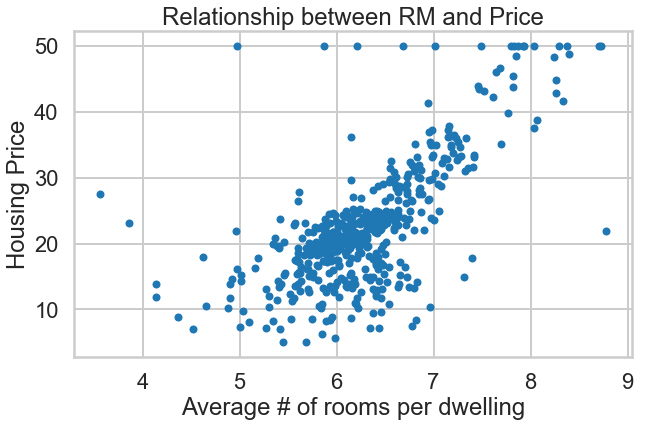

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
plt.figure(figsize=(10, 6))
plt.scatter(bos.RM, bos.PRICE, marker='.')
plt.xlabel("Average # of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Based on the above scatterplot, there appears to be a positive linear relationship between the average number of rooms per dwelling and the housing price; as the average number of rooms increases, so does the housing price. This makes intuitive sense, as a dwelling with more rooms is likely to be larger than a dwelling with a smaller number of rooms, and thus is more likely to cost more than a smaller house. Again we can see that the maximum housing price tops out at 50k - it would be interesting to see the actual prices of houses in this category (unless there truly are no houses with prices over 50K, which I doubt).

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

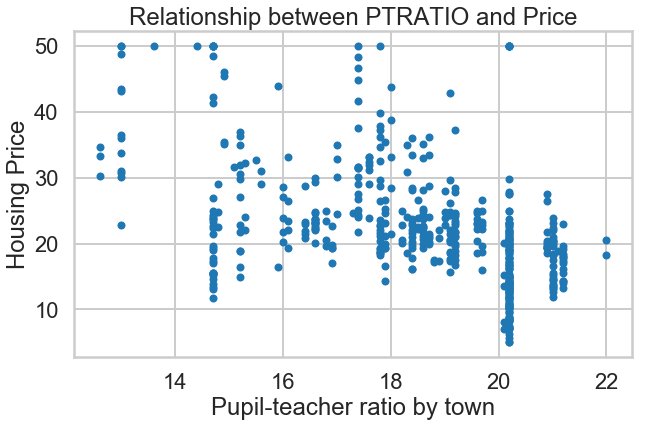

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.figure(figsize=(10, 6))
plt.scatter(bos.PTRATIO, bos.PRICE, marker='.')
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

From the graph above, there does not seem to be any strong relationship between pupil-teacher ratio and housing price, though the lowest pupil-techer ratios have housing prices above 20K, while the upper pupil-teacher ratios have housing prices lower than 30k. This trend might result in a slight negative correlation, but probably with a very gentle slope.

Some other variables of interest are age, i.e. the proportion of properties built before 1940. It would be interesting to see if there was a correlation between property age and price. I would also like to see the relationship between distance to employment centers and the proportion of non-retail businesses to housing price.

Text(0.5, 1.0, 'Relationship between LSTAT and Price')

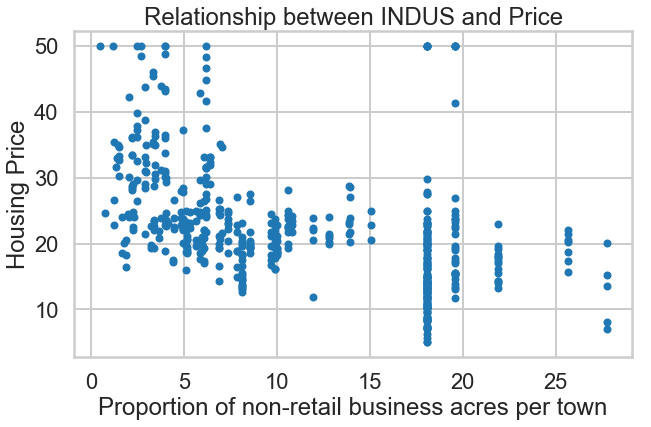

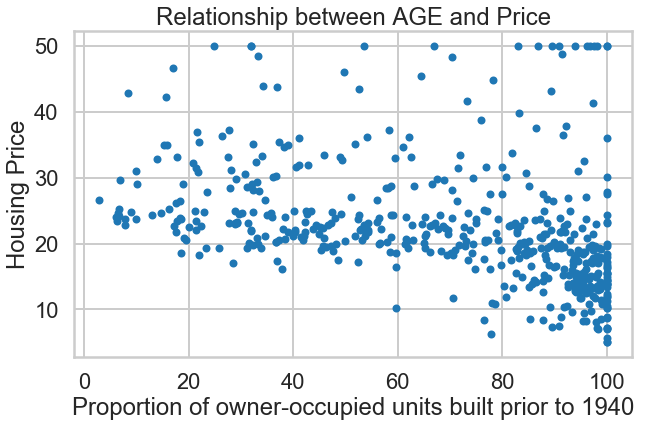

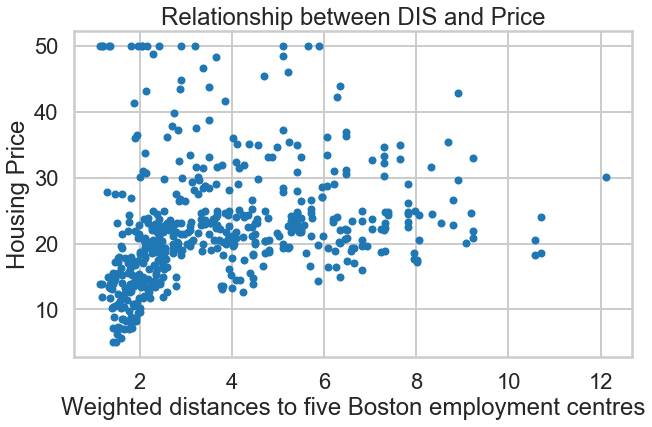

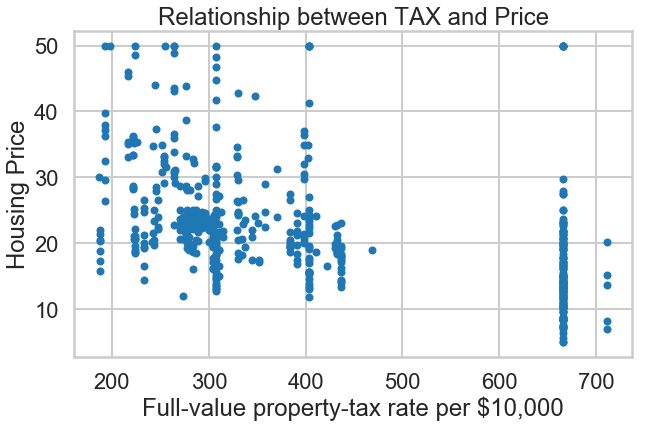

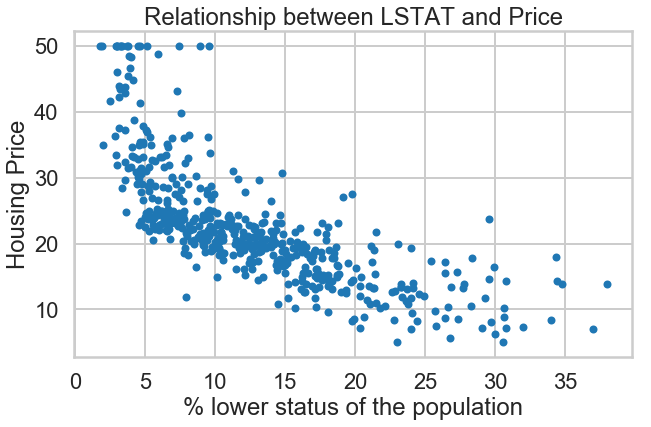

In [15]:
# your turn: create some other scatter plots

plt.figure(figsize=(10, 6))
plt.scatter(bos.INDUS, bos.PRICE, marker='.')
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Housing Price")
plt.title("Relationship between INDUS and Price")

plt.figure(figsize=(10, 6))
plt.scatter(bos.AGE, bos.PRICE, marker='.')
plt.xlabel("Proportion of owner-occupied units built prior to 1940")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")

plt.figure(figsize=(10, 6))
plt.scatter(bos.DIS, bos.PRICE, marker='.')
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

plt.figure(figsize=(10, 6))
plt.scatter(bos.TAX, bos.PRICE, marker='.')
plt.xlabel("Full-value property-tax rate per $10,000")
plt.ylabel("Housing Price")
plt.title("Relationship between TAX and Price")

plt.figure(figsize=(10, 6))
plt.scatter(bos.LSTAT, bos.PRICE, marker='.')
plt.xlabel("% lower status of the population")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

The first graph shows the relationship between the proportion of non-retail businesses and price. The relationship does not appear to be similar, but rather seems to have an inflection point in the housing prices. The housing prices do not appear to be effected by the percentage of non-retail businesses up to around 10%, but anything more than 10% decreases the housing price significantly.

The second graph shows how the age of properties effects housing prices. As the proportion of units built prior to 1940 increases, the number of properties with lower prices increases. There are also a higher proportion of housing prices that are older, so the overall density of the graph increases as the proportion of older units increases (i.e., there are more older units than newer units in the Boston area).

In the third graph, the house prices increase as the distance to employment centers increases. While properties close to employment centers would have benefits of shorter commuting times, they are also closer to the busy, crowded areas of the city. It seems that the downsides to living closer to the city center outweigh the advantage of a decreased commute.

The 4th graph is a bit confusing, as the properties with the lowest prices have a higher tax rate per $10,000. However, this is probably an effect of hitting the mimimum property tax rate.

Finally, the last graph shows a negative linear relationship between the % of population with lower status and housing prices; that is, as the % of the lower-status population increases, housing prices drop. This makes intuitive sense, as the population with lower status will have less accumulated wealth to spend on housing.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

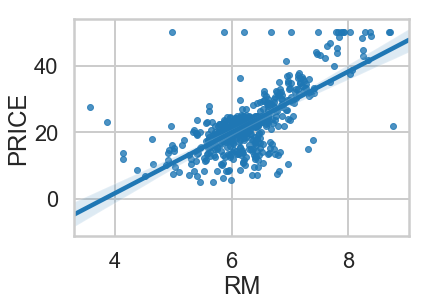

In [16]:
sns.regplot(y="PRICE", x="RM", data=bos, marker='.', fit_reg = True)

### Histograms
***


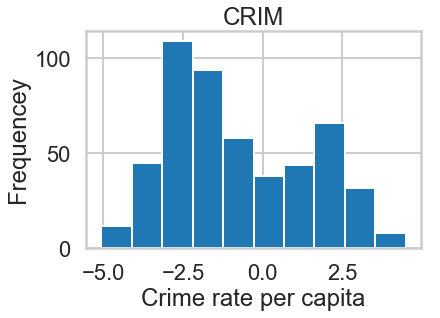

In [17]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

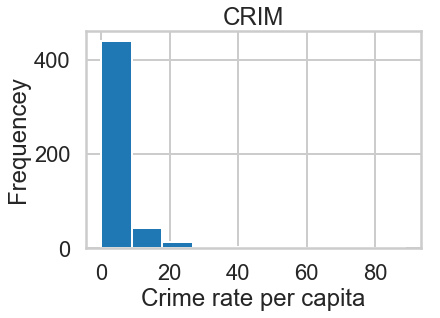

In [18]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

The data is highly skewed, so taking the log of the data transforms the data so that it follows a normal distribution. This allows us to see trends that are not visible by looking at the raw data.

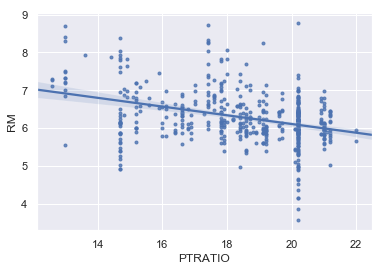

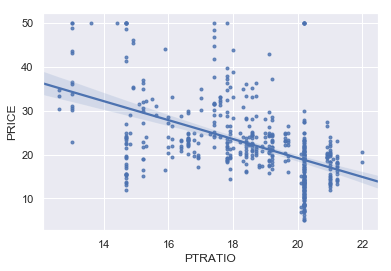

In [19]:
sns.set()
sns.regplot(y="RM", x="PTRATIO", data=bos, marker='.', fit_reg = True)
plt.show()
sns.regplot(y="PRICE", x="PTRATIO", data=bos, marker='.', fit_reg = True)
plt.show()

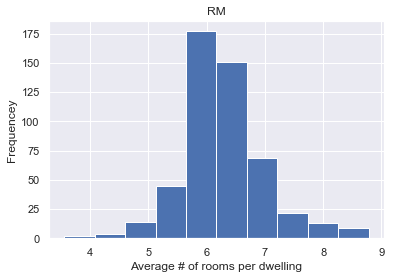

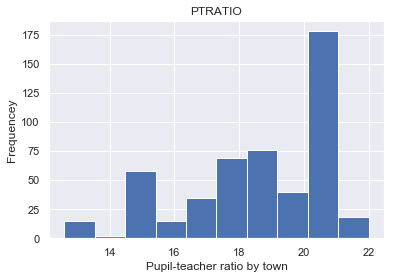

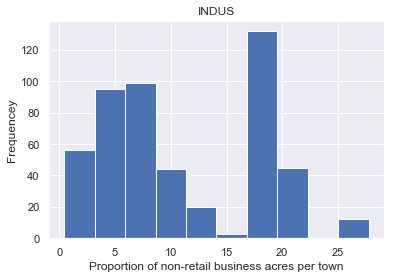

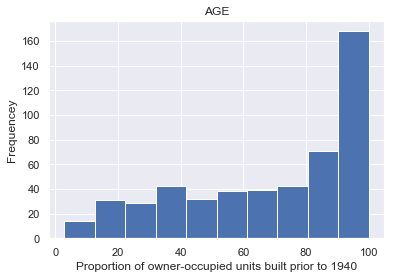

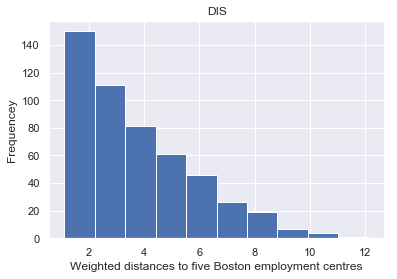

In [20]:
#your turn
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Average # of rooms per dwelling")
plt.ylabel("Frequencey")
plt.show()

plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Frequencey")
plt.show()

plt.hist(bos.INDUS)
plt.title("INDUS")
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Frequencey")
plt.show()

plt.hist(bos.AGE)
plt.title("AGE")
plt.xlabel("Proportion of owner-occupied units built prior to 1940")
plt.ylabel("Frequencey")
plt.show()

plt.hist(bos.DIS)
plt.title("DIS")
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Frequencey")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [21]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           2.49e-74
Time:                        20:28:42   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

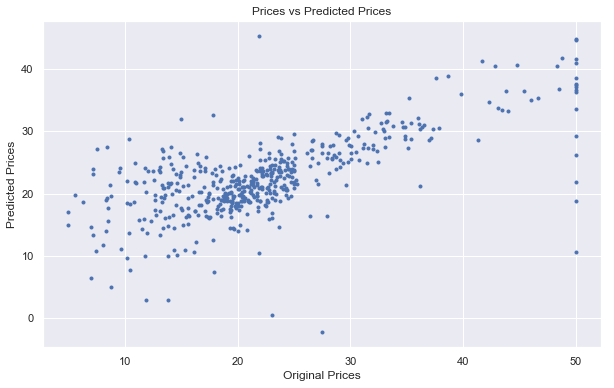

In [23]:
# your turn
plt.figure(figsize=(10, 6))
plt.scatter(bos['PRICE'], m.fittedvalues, marker='.')
plt.xlabel("Original Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

As I noted in the earlier graphs, there is a ceiling in the original prices that should probably be investigated. In addition, these higher values are not well predicted; many of the predicted values are much lower than the actual values.

### Fitting Linear Regression using `sklearn`


In [24]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [25]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [26]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [27]:
# your turn
my_lm = LinearRegression(fit_intercept=False)
my_lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

1. To not fit an intercept term, you need to set fit_intercept to False when initializing the LinearRegression object. You might not want to fit an intercept when you want the regresssion line to go through zero. For this dataset, we do want to fit an intercept term, as all housing prices are above 0.

2. It is not enough that the residuals are normally distributed; you also need to plot the residuals and ensure that they are non-linear and do not display any pattern - the residual plot should look randomly distributed.

3. False - Y should have a linear relationship with the independent variables. The errors (residuals) should be normally distributed.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [28]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [29]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [30]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [31]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

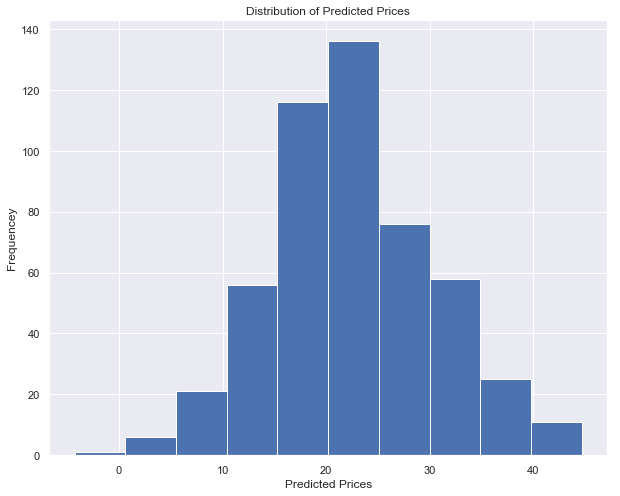

In [32]:
# your turn
plt.figure(figsize=(10,8))
plt.hist(lm.predict(X), bins=10)
plt.title("Distribution of Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequencey")
plt.show()

**Exercise 1:** The histogram is centered between 20-25k and appears to be roughly normally distributed. The spread goes from 0 to 45, which seems unrealistic as housing prices are not going to drop all the way to 0. In addition, there are a few outliers with negative housing prices.

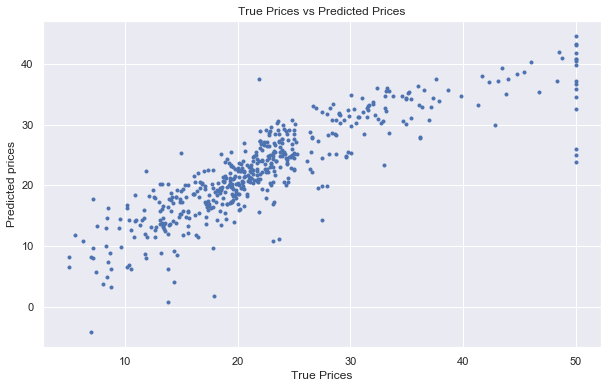

In [33]:
sns.set()
plt.figure(figsize=(10, 6))
plt.scatter(bos.PRICE, lm.predict(X), marker='.')
plt.xlabel("True Prices")
plt.ylabel("Predicted prices")
plt.title("True Prices vs Predicted Prices")
plt.show()

**Exercise 2:** As we saw using 'statsmodels', the model is not good at predicting housing prices between 40K and the ceiling price of 50K. You can also clearly see the outlier with the negative prediction price. In general, the model tends to slightly underestimate the housing prices.

**Exercise 3:**   
_statsmodels:_ The advantage of using 'statsmodels' is that the statsmodels modules have been extensively tested and most results have been verified against another major statistical package, such as R, Stata, or SAS. It also uses formulas and syntax similar to R, which is more commonly used by statisticians, and has a wider variety of models and more of an emphasis on understanding the relevant variables rather than simply finding the best fit model. Most importantly, the `.summary()` method provides great summary output that presents all of the parameter coefficients, p-values, standard error, and confidence intervals, along with other useful information about the model, such as the $R^2$ value. The disadvantage of _statsmodels_ is that it is more difficult to perform hyperparameter tuning and cross-validation to select the best model.

_sciki-learn:_ scikit-learn offers many simple, easy-to-learn machine learning algorithms that only require that the data is organized in a certain way. You can easily run a variety of models to find the best fit, and there are pipelines and tools that make transforming your data and choosing the right model and variables easier. _scikit-learn_ also has built-in methods that make prediction, cross-validation, and hyperparameter tuning very simple and easy to use. However, it does not have a simple summary output method; instead, the output parameters must be organized and output separately.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [34]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [35]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

2.908056841006738e-26


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [36]:
# your turn
linreg1 = ols('PRICE ~ PTRATIO',bos).fit()
print(linreg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           1.61e-34
Time:                        20:28:43   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

### Part 3 Checkup Exercise Set IV Responses ###
**Exercise 1:** The output summary above shows the results of fitting a linear regression model using only PTRATIO as a predictor variable. The intercept of the linear regression line is 62.3446, and the coefficient for PTRATIO is -2.1572, indicating that PTRATIO has a slight negative effect on housing price. That is, as the pupil-teacher ratio increases, the housing price decreases. The y-intercept in this case predicts that a pupil-teacher ratio of 0 would result in housing prices of approximately $62,345; however, the pupil-teacher ratio would never realistically drop that low.

**Exercise 2:** As seen in the summary output, the $R^2$ value is 0.258. Such a low $R^2$ value indicates that PTRATIO alone is not a very good predictor of housing price, as only 25.8% of the variance in housing price can be explained by the pupil-teacher ratio.

**Exercise 3:** From the summary output, we can see that the F-statistic is 175.1, which indicates that the explained variance is a good deal larger than the unexplained variance. A large F-statistic indicates that at least one $\beta$ coefficient is significant (i.e. nonzero) - as we only fit the model with one variable, we can conclude that PTRATIO has a significant nonzero effect on the housing price.

**Exercise 4:** The F-statistic is 175.1, which is the square of the t-statistic, -13.233: $(-13.233)^2 = 175.1$

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [37]:
# your turn
linreg2 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(linreg2.summary())
print('')

# your turn
lm_2 = LinearRegression()
X = bos[['CRIM', 'RM', 'PTRATIO']]
lm_2.fit(X, bos.PRICE)
print('scikit-learn OLS Regression Results:')
print('R^2 value: {}'.format(lm_2.score(X, bos.PRICE)))
print('Estimated intercept coefficient: {}'.format(lm_2.intercept_))

print('R^2:', (linreg2.ess/(linreg2.ess + linreg2.ssr)))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           6.15e-98
Time:                        20:28:43   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

### Part 3 Checkup Exercise Set IV Responses ###
**Exercise 1:** The F-statistic is 245.2 - this tells us that at least one of the variables has a nonzero coefficient, that is, that there is a significant linear relationship between the response variable (housing price) and at least one of the predictor varaibles (CRIM, RM, PTRATIO). It does not tell us which variable or variables are significant.

**Exercise 2:** The $R^2$ value is 0.594, which tells us that 59.4% of the variance in housing price is explained by this linear regression model.

**Exercise 3:** All of the included predictor variables (CRIM, RM, PTRATIO) are significant for predicting the housing price, as the p-values are all essentially 0. The coefficients of the predictor variables are as follows:  
CRIM coefficient: -0.2050  
RM coefficient: 7.3804  
PTRATIO coefficient: -1.0695  
These coefficients tell us that **1)** the per capita crime rate per town (CRIM) has a slight negative effect on housing price, **2)** the number of rooms (RM) has a fairly large positive effect on housing price, and **3)** the pupil-teacher ratio per town has a modest negative effect on housing price.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [38]:
linreg3 = ols('PRICE ~ CRIM + RM + PTRATIO + DIS + LSTAT',bos).fit()
print(linreg3.summary())

print('')
print('Sum of squared residuals for the reduced model:', linreg2.ssr)
print('Sum of squared residuals for the full model:', linreg3.ssr)
print('Residual degrees of freedom for reduced model:', linreg2.df_resid)
print('Residual degrees of freedom for full model:', linreg3.df_resid)
F_nested = ((linreg2.ssr - linreg3.ssr)/(linreg2.df_resid - linreg3.df_resid)) / (linreg3.ssr / linreg3.df_resid)
print('F-statistic comparing full and reduced models:', (F_nested))
print('')
print('AIC of reduced model:', linreg2.aic)
print('AIC of full model:', linreg3.aic)

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     228.7
Date:                Fri, 08 Mar 2019   Prob (F-statistic):          1.10e-126
Time:                        20:28:43   Log-Likelihood:                -1539.2
No. Observations:                 506   AIC:                             3090.
Df Residuals:                     500   BIC:                             3116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8945      4.080      5.611      0.0

### Part 4 Checkup Exercise ###
I added both DIS, the weighted distances to five Boston employment centres, and LSTAT, the % of population of lower status, as predictor variables to the earlier model using CRIM, RM, and PTRATIO.  
**F-statistic:** The F-statistic comparing the two models is 83.35, indicating that adding the two extra predictor variable increased the model fit.  
**AIC values:** The full model has an AIC of 3090.35, while the reduced model has an AIC of 3231.95. The lower AIC value of the full model indicates that it is a better fitting model than the reduced model. 


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

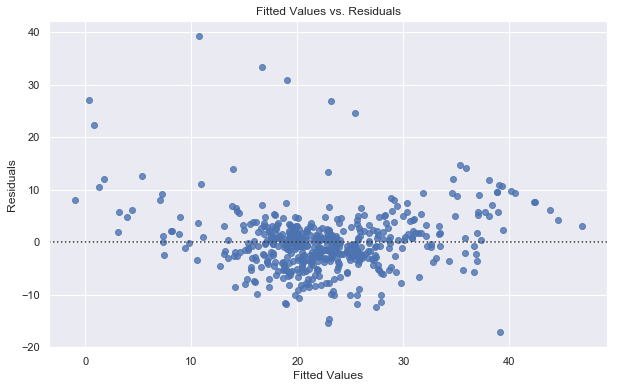

In [39]:
# Your turn.
sns.set()
plt.figure(figsize=(10,6))
sns.residplot(linreg2.fittedvalues, linreg2.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')
plt.show()

**Exercise 1:** From the fitted values vs. residual plot, we can see that the residuals are actually nonlinear. Instead, the residuals seem to have a parabolic shape instead, as they start above 0 on the left side, dip down below 0 around the middle, and then go back up above zero on the right side. Therefore, the residuals are not normally distributed, which violates one of the assumptions of linear regression and indicates that at least one of the parameters used to fit the linear model does not actually have a linear relationship with housing price.   
In this residual plot, the slight U-shape and the unbalanced distribution along the y-axis indicate two potential problems. First, the U-shape suggests that the housing data is not be linear and might be better explained using a non-linear model. Second, the concentration and spread of the residuals along the y-axis strongly indicate the presence of outliers in the data - not only is there a higher concentration of positive residuals, but the spread of positive residuals goes from 0 to 40 vs 0 to 20 for negative residuals.

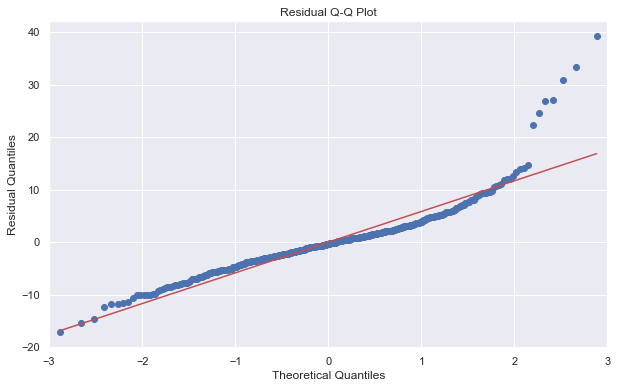

In [40]:
fig, ax = plt.subplots(figsize=(10,6))

probplot = sm.ProbPlot(linreg2.resid, dist="norm")
fig = probplot.qqplot(ax=ax, ylabel='Residual Quantiles', line='s')
plt.title("Residual Q-Q Plot")
plt.show()

**Exercise 2:** As you can see from the quantile plot above, the residuals of the linear model are NOT normally distributed. In a Q-Q plot, the quantiles of a dataset are plotted against the quantiles of a known distribution (the normal distribution in this case). If the data fit the given distribution, the resulting plot should approximate a straight line. However, we can clearly see from our plot that the quantiles of the linear model residuals are not linear, and therefore the residuals are not normally distributed. The Q-Q plot seems to have a slight S-shape, though the most noticable feature is the presence of a group of outliers on the far right of the plot in which the residuals are greater than 20.

**Exercise 3:** A residual plot is not only helpful in determining whether the residuals are normally distributed but may also indicate how the model can be improved based on the pattern of the residual plot. The disadvantage of a residual plot is that it might be harder to spot divergence from a normal distribution. However, a residual plot can easily identify heteroscedacity in the data, which occurs when the residual get steadily larger as the predeicted values increase or decrease. Observing this pattern in the residuals tells you that the standard deviation of Y is not constant.  
The advantages of a quantile plot of the residuals is that it is very easy to spot non-normal data; a residual Q-Q plot that is non-linear quickly tells you that the residuals are not normally ditributed. In addition, the shape of a non-linear Q-Q plot is also informative and can indicate skewness of the residuals (concavity indicates a negative skew, while convexity indicates a positive skew. The biggest advantage of a Q-Q plot, however, is that it is very easy to spot outliers in the data.

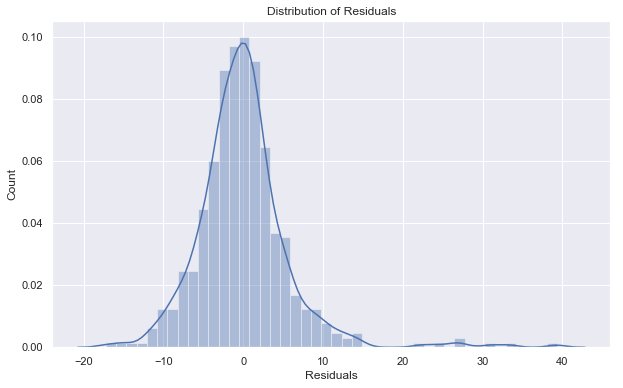

In [41]:
plt.figure(figsize=(10,6))
sns.distplot(linreg2.resid, norm_hist=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.show()

In [42]:
outliers = bos[(linreg2.resid > 20)].copy()
outliers['Y_PRED'] = linreg2.fittedvalues[(linreg2.resid > 20)]
outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Y_PRED
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,0.372333
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,0.763471
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,10.701164
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,23.185628
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,25.465239
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,19.008840
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,16.689917


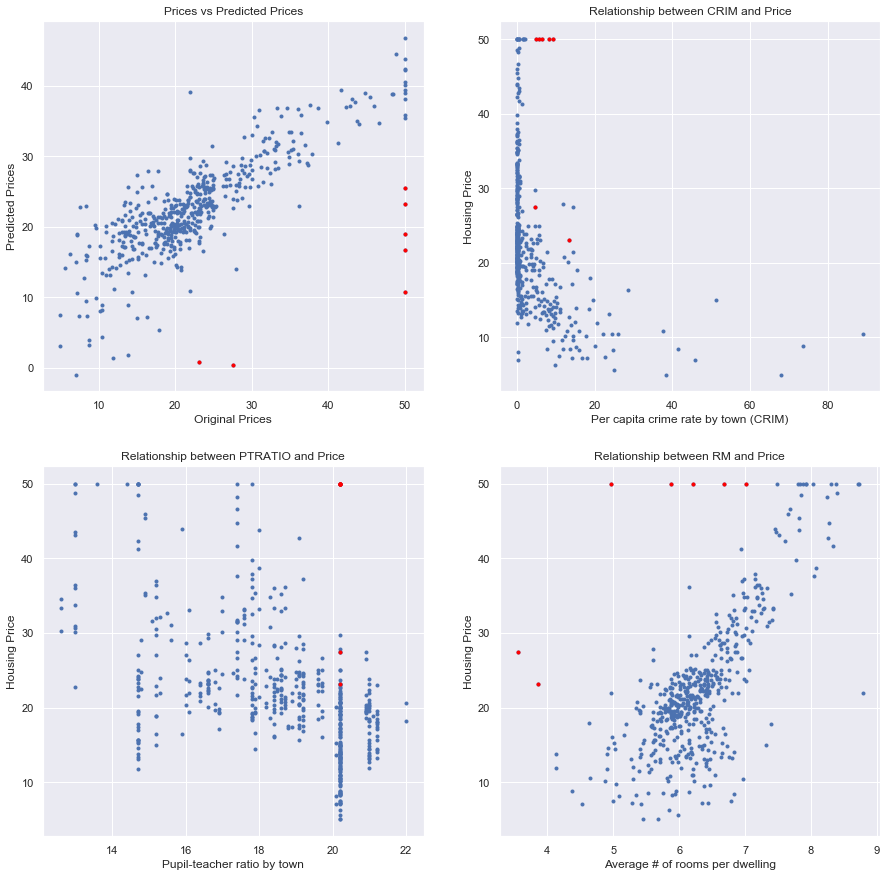

In [43]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.scatter(bos.PRICE, linreg2.fittedvalues, marker='.')
plt.scatter(outliers['PRICE'], outliers['Y_PRED'], marker='.', color='red')
plt.xlabel("Original Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")

plt.subplot(2,2,2)
plt.scatter(bos.CRIM, bos.PRICE, marker='.')
plt.scatter(outliers.CRIM, outliers.PRICE, marker='.', color='red')
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

plt.subplot(2,2,3)
plt.scatter(bos.PTRATIO, bos.PRICE, marker='.')
plt.scatter(outliers.PTRATIO, outliers.PRICE, marker='.', color='red')
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.subplot(2,2,4)
plt.scatter(bos.RM, bos.PRICE, marker='.')
plt.scatter(outliers.RM, outliers.PRICE, marker='.', color='red')
plt.xlabel("Average # of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

plt.show()

**Exercise 4:** Both the fitted vs residuals plot and the quantile plot of the residuals identify 7 outlier data points where the residuals are greater than 20. We can filter these 7 data points based on their residual values and then examine these data points in the original dataset. From here we can see that five of the outliers have housing prices of \\$50,000 and the other two have lower housing prices. For all of the outliers, the model predicted housing prices that were more than \\$20,000 lower than the actual prices.  
It is helpful at this point to examine these outliers within scatterplots for each of the predictor variables to see if there are any patterns. From the scatterplot of RM vs PRICE, we can see that all seven of the identified outliers (in red) have a lower average # of rooms compared to similarly-priced houses. Additionally, the five outliers with housing prices of \\$50,000 have higher crime rates than any other houses priced above \\$30,000 (put another way, houses with similar crime rates have prices under \\$30,000).

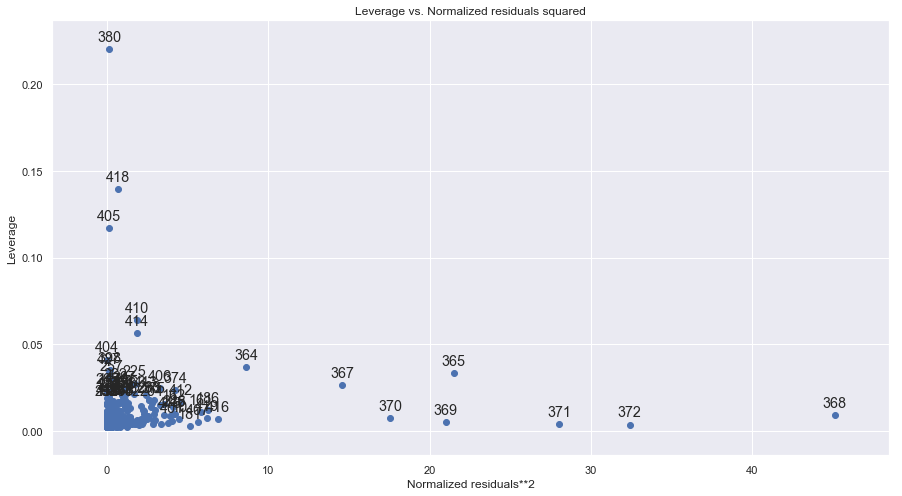

In [44]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot
fig, ax = plt.subplots(figsize=(15, 8))
fig = plot_leverage_resid2(linreg2, ax=ax)

In [45]:
high_lev = bos.iloc[[380, 405, 418], :].copy()
high_lev['Y_PRED'] = linreg2.fittedvalues[[380, 405, 418]]
high_lev

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Y_PRED
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4,8.214533
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0,3.046237
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8,3.917963


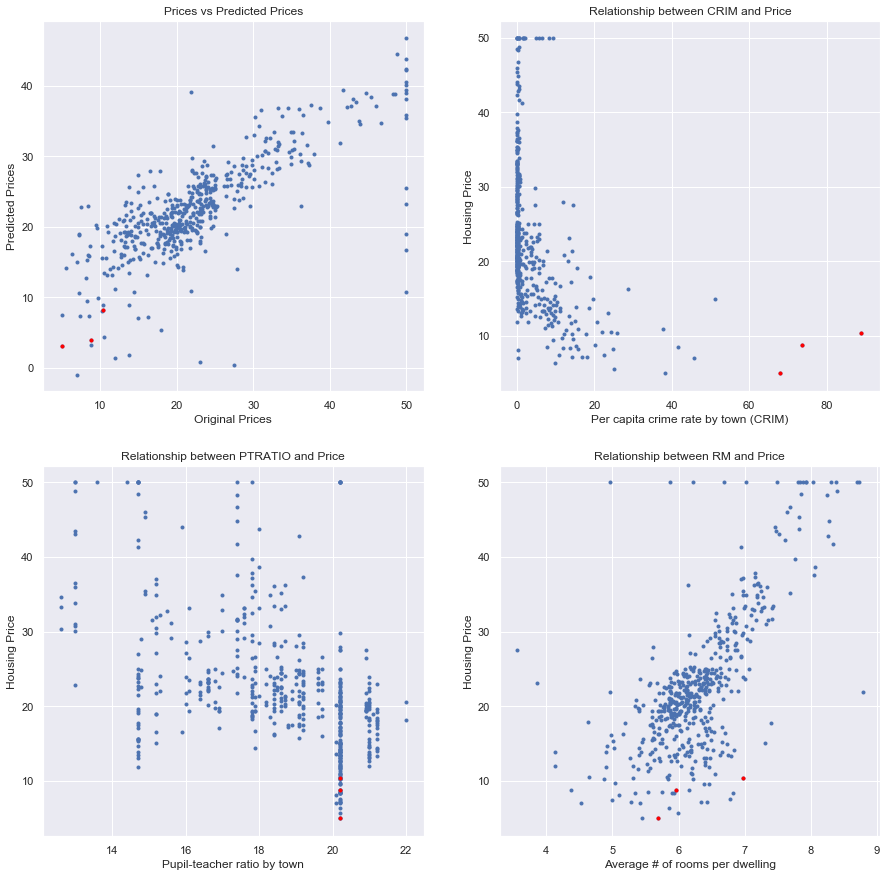

In [46]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.scatter(bos.PRICE, linreg2.fittedvalues, marker='.')
plt.scatter(high_lev.PRICE, high_lev.Y_PRED, marker='.', color='red')
plt.xlabel("Original Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")

plt.subplot(2,2,2)
plt.scatter(bos.CRIM, bos.PRICE, marker='.')
plt.scatter(high_lev.CRIM, high_lev.PRICE, marker='.', color='red')
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

plt.subplot(2,2,3)
plt.scatter(bos.PTRATIO, bos.PRICE, marker='.')
plt.scatter(high_lev.PTRATIO, high_lev.PRICE, marker='.', color='red')
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.subplot(2,2,4)
plt.scatter(bos.RM, bos.PRICE, marker='.')
plt.scatter(high_lev.RM, high_lev.PRICE, marker='.', color='red')
plt.xlabel("Average # of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

plt.show()

**Exercise 5:** The leverage plot clearly highlights 3 data points with very high leverage. If we then look at the data for these three points in the Boston housing dataset, we can see right away that these three data points have very high crime rates. If we then highlight the three high-leverage points within scatterplots of the three predictor variables vs housing price, we can see that these three points have the highest crime rates in the entire dataset, while the values for the other two predictors fit the overal trends.

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     414.5
Date:                Fri, 08 Mar 2019   Prob (F-statistic):          3.19e-134
Time:                        20:50:13   Log-Likelihood:                -1468.9
No. Observations:                 496   AIC:                             2946.
Df Residuals:                     492   BIC:                             2963.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0479      3.294     -1.836      0.0

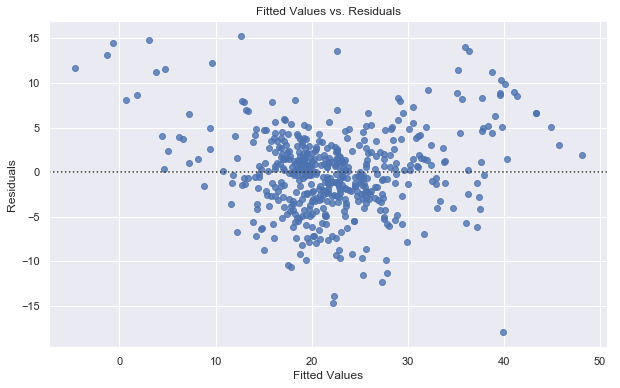

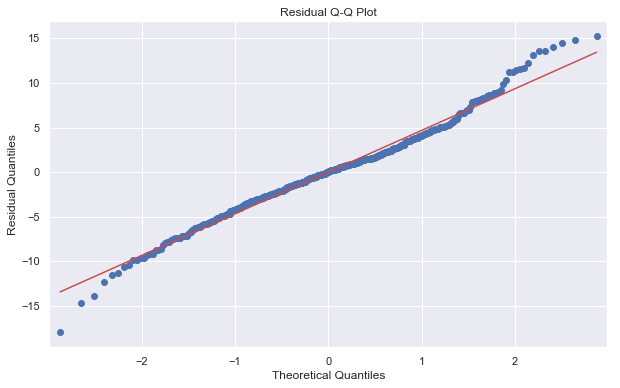

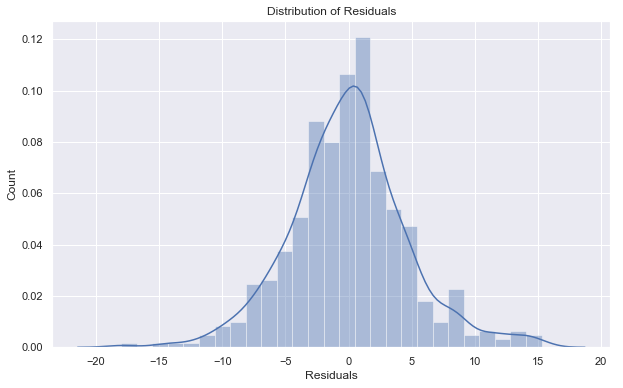

In [60]:
drop_list = [365, 367, 368, 369, 370, 371, 372, 380, 405, 418]
bos_trimmed = bos.drop(index=drop_list)

linreg4 = ols('PRICE ~ CRIM + RM + PTRATIO',bos_trimmed).fit()
print(linreg4.summary())

plt.figure(figsize=(10,6))
sns.residplot(linreg4.fittedvalues, linreg4.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
probplot = sm.ProbPlot(linreg4.resid, dist="norm")
fig = probplot.qqplot(ax=ax, ylabel='Residual Quantiles', line='s')
plt.title("Residual Q-Q Plot")
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(linreg4.resid, norm_hist=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.show()

**Exercise 6:** From the summary report of the linear model generated after removing the outliers and high leverage points, we can see that both the $R^2$ and AIC values have improved from the previous model. The $R^2$ value has increased from 0.594 to 0.717, indicating that the new model explains 12.3% more of the y variability than the previous model. Additionally, the AIC has decreased from 3232 to 2946, indicating that the new model is a better fit than the previous model.
$R^2$ with all data: 0.594
$R^2$ without outliers & high leverage data: 0.717
AIC with all data: 3232
AIC without outliers & high leverage data: 2946

Looking at the fitted values vs. residuals and the quantile plots for the new model, we can see that the outlier data that were visible in the previous model are now gone. However, the divergent tails observed on either end of the Q-Q plot shows that the distribution of the residuals has heavier tails than a normal distribution. In addition, the residual plot still has a slight U-shape, suggesting the data is nonlinear. Taken together, these plots show that the linear model is underestimating the housing prices for both low housing prices and high housing prices, which suggests that housing prices might be more accurately modeled using a nonlinear model.